In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,41968,None,None,85778.693181
2020-06-13,41969,None,None,79684.292476
2020-06-14,41970,None,None,74030.922132
2020-06-15,41971,None,None,68705.838448
2020-06-16,41972,None,None,63962.701640
...,...,...,...,...
2021-03-23,42252,None,None,73594.336099
2021-03-24,42253,None,None,72566.159181
2021-03-25,42254,None,None,71879.628417


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-27_2021-03-27-16-46.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-26_2021-03-26-17-24.pickle


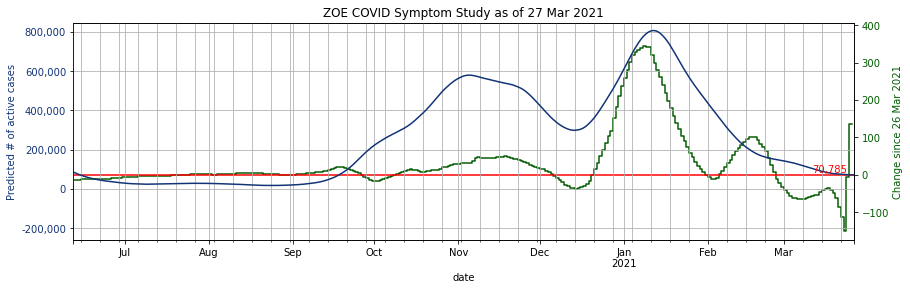

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

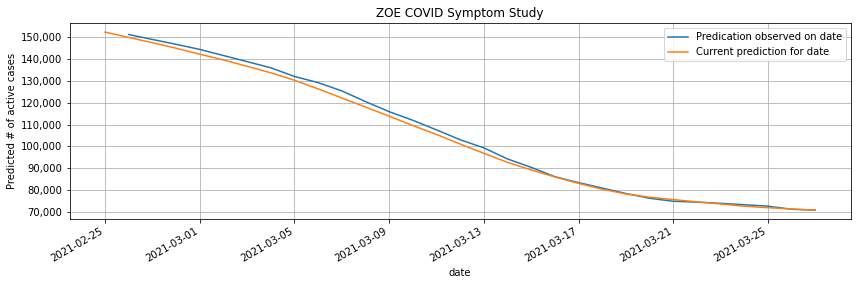

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-27_2021-03-27-16-46.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
324,East Dunbartonshire,S12000045,0.872851
367,Ards and North Down,N09000011,0.534986
54,Luton,E06000032,0.520942
206,Ashfield,E07000170,0.424706
153,North West Leicestershire,E07000134,0.416877
376,South Lanarkshire,S12000029,0.416592
320,West Lothian,S12000040,0.383022
18,North Lincolnshire,E06000013,0.379587
124,Harlow,E07000073,0.366720
354,Westminster,E09000033,0.341387
